In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation Library
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

C:\Users\keert\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#!pip install scikeras

In [3]:
#%pip install scikeras


In [4]:
#!pip install tensorflow==2.7.0

In [5]:
#!pip install --upgrade --force-reinstall tensorflow==2.11.0 keras==2.11.0 tensorflow-estimator==2.11.0


In [6]:
(x_train_digit, y_train_digit), (x_test_digit, y_test_digit) = mnist.load_data()

In [7]:
print(x_train_digit.shape)
print(x_test_digit.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit= x_test_digit.reshape(10000, 784)

In [9]:
print(x_train_digit.shape)
print(x_test_digit.shape)

(60000, 784)
(10000, 784)


In [10]:
print(y_train_digit.shape)
print(y_test_digit.shape)
y_train_digit

(60000,)
(10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train_digit=to_categorical(y_train_digit, num_classes=10)
y_test_digit=to_categorical(y_test_digit, num_classes=10)

In [12]:
print(y_train_digit.shape)
print(y_test_digit.shape)
y_train_digit

(60000, 10)
(10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
model = keras.Sequential([
    Input(shape=(784,)),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [16]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - Accuracy: 0.7985 - loss: 1.4462 - val_Accuracy: 0.9099 - val_loss: 0.3541
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9254 - loss: 0.2427 - val_Accuracy: 0.9272 - val_loss: 0.2400
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9439 - loss: 0.1561 - val_Accuracy: 0.9432 - val_loss: 0.2133
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9468 - loss: 0.1294 - val_Accuracy: 0.9339 - val_loss: 0.2039
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9513 - loss: 0.1177 - val_Accuracy: 0.9411 - val_loss: 0.2057
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9538 - loss: 0.1069 - val_Accuracy: 0.9456 - val_loss: 0.1756
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - Accuracy: 0.9553 - loss: 0.0967 - val_Accuracy: 0.9301 - val_loss: 0.2088
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Accuracy: 0.9461 - loss: 0.0886 - val_Accuracy: 

In [17]:
y_pred=model.predict(x_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
y_predict= np.argmax(y_pred, axis=1 )
y_predict

array([7, 2, 1, ..., 4, 2, 6], dtype=int64)

In [19]:
y_test_digit_eval= np.argmax(y_test_digit, axis=1 )
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

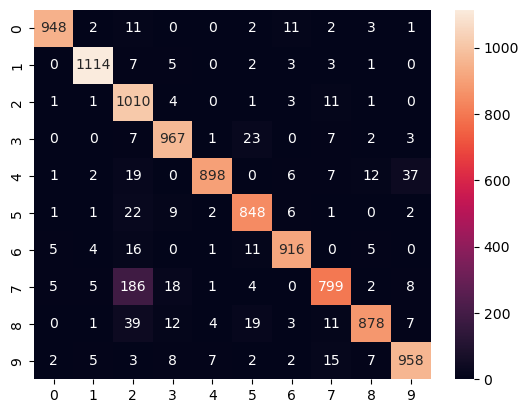

In [20]:
cm= confusion_matrix(y_test_digit_eval, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
plt.show

In [21]:
report= classification_report(y_test_digit_eval, y_predict)

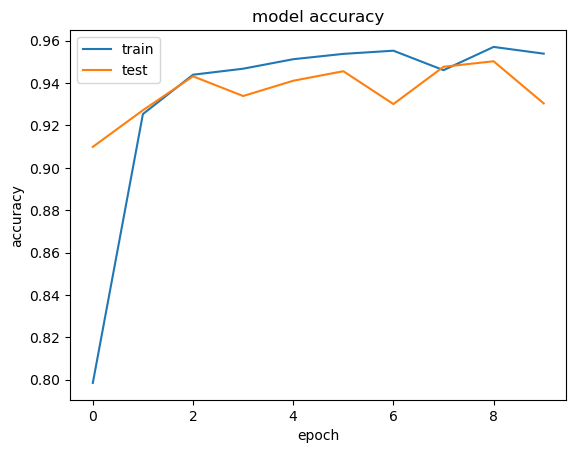

In [22]:
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

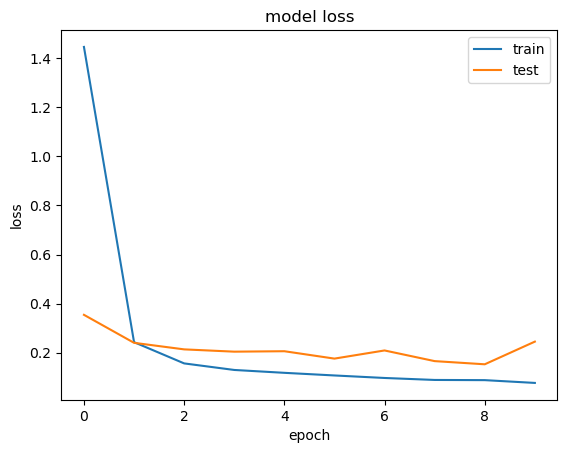

In [23]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [30]:
y_pred_single=model.predict(x_test_digit[[3]])
y_predict_single= np.argmax(y_pred_single, axis=1 )

y_test_digit_eval= np.argmax(y_test_digit, axis=1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


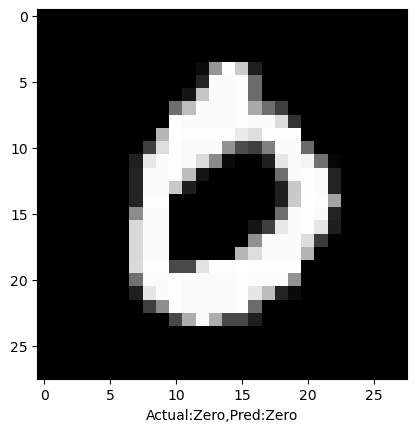

In [31]:
#Names of numbers in the dataset in order
col_names = ['Zero','One' ,'Two' ,'Three' ,'Four','Five','Six','Seven' ,'Eight','Nine']

#Visualizing the digits
plt.imshow(x_test_digit[3].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[3])], col_names[y_predict_single[0]]))
plt.show()